# Выявление определяющих успешность игры закономерностей

Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Данные за 2016 год могут быть неполными.

### Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Откроем файл с данными и изучим общую информацию

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Вывод

Можно увидеть, что в данных есть пропуски. Судя по названиям столбцов, некоторые типы данных установлены некорректно.

## Шаг 2. Подготовим данные

In [6]:
# Заменим названия столбцов (приведём к нижнему регистру)
df.columns = [i.lower() for i in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# Заполним пропуски и приведём к типам данных.

# Пропуск имени и жанра. Заполнены только продажи, но без связи с другими данными они бесполезны. Удаляем.
df = df[~df['name'].isna()]

"""
Пропуски в году релиза оставим. Тут подставить значение не представляется возможным.

Оставляем пропуски в столбцах рейтинга. Заполнять каким-либо значением будет некорректно:
1. При заполнении нулями, собьются данные по среднему и прочим характеристикам.
2. Заполнять каким-либо значением, это будет самостоятельным присвоением рейтинга.

В столбцах рейтинга приведём к NaN значения 0 (такого рейтинга не бывает, даже у самой плохой игры) и tbd (будет определено).
Так будет правильно, как минимум из-за расчета стат параметров. user_score приведём к float.
Столбцы содержащие NaN остаются float из-за особенностей pandas.
"""

df.loc[(df['critic_score'] == 0) | (df['critic_score'] == 'tbd') | (df['critic_score'] == 'NaN'), 'critic_score'] = np.NaN

df.loc[(df['user_score'] == 0) | (df['user_score'] == 'tbd') | (df['critic_score'] == 'NaN'), 'user_score'] = np.NaN
df['user_score'] = df['user_score'].astype(float)

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
df_rat = df[~df['rating'].isna()][['name', 'rating']].drop_duplicates()
df_rat[df_rat['name'].duplicated()].sort_values('name')

,name,rating
10512,Astro Boy: The Video Game,E
5454,Avatar: The Last Airbender,E
13273,Barnyard,E
8313,Batman Begins,E10+
12193,Batman: Rise of Sin Tzu,E
...,...,...
7562,X2: Wolverine's Revenge,E
12889,Xiaolin Showdown,E
14528,Young Justice: Legacy,E10+
13381,Ys: The Ark of Napishtim,E10+


In [9]:
# На разных платформах могут быть разные рейтинги.
df[df['name'] == 'Astro Boy: The Video Game'][['name', 'platform', 'rating']]

,name,platform,rating
10176,Astro Boy: The Video Game,PS2,E10+
10305,Astro Boy: The Video Game,Wii,E10+
10512,Astro Boy: The Video Game,DS,E
13890,Astro Boy: The Video Game,PSP,E10+


In [10]:
# Добавляем столбец со всеми продажами.
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

Мы привели датасет к читаемому виду. Изменили названия столбцов, обработали пропуски, привели к нужным типам данных.
Пропуски могли возникнуть по разным причинам: от некорректного способа сбора информации до реального отсутствия рейтинга у какой-нибудь нишевой игры.

## Шаг 3. Проведём исследовательский анализ данных

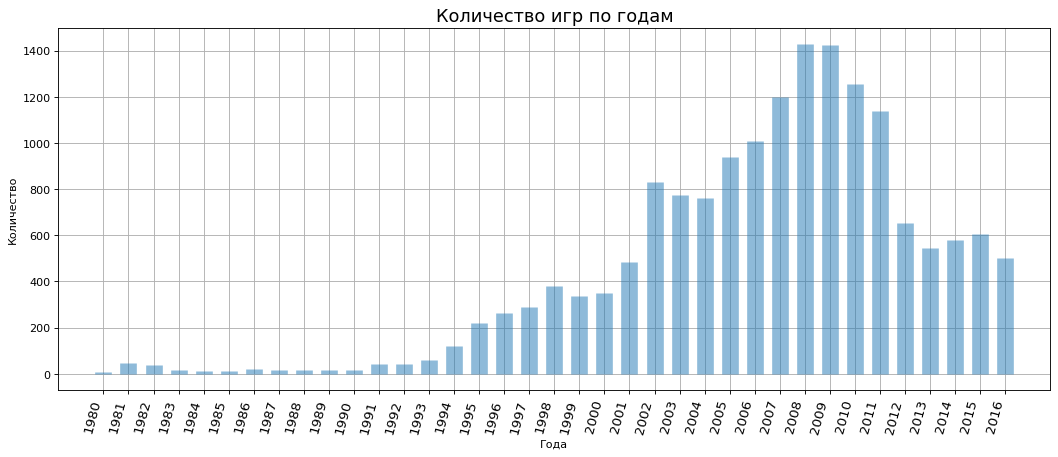

In [11]:
# Посмотрим, сколько игр выпускалось в разные годы.

df_year = df.pivot_table('name', index='year_of_release', aggfunc='count').reset_index()
df_year.columns = ['year_of_release', 'count']
df_year['year_of_release'] = df_year['year_of_release'].astype(int)

fig, ax = plt.subplots(figsize=(16,6), dpi= 80)

ax.vlines(x=df_year['year_of_release'], ymin=0, ymax=df_year['count'], color='tab:blue', alpha=0.5, linewidth=15)
ax.set_title('Количество игр по годам', fontdict={'size':16})
ax.set(xlabel='Года', ylabel='Количество')
plt.xticks(df_year.year_of_release, rotation=75, horizontalalignment='right', fontsize=12)
plt.grid()
plt.show()

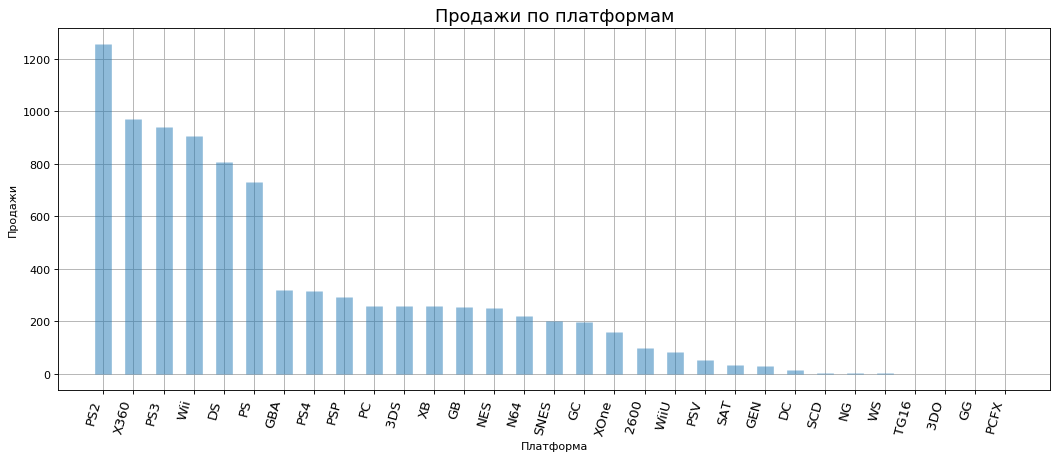

In [12]:
# Посмотрите продажи по платформам.
df_platforms = (df.pivot_table('all_sales', index='platform', aggfunc='sum').reset_index().
              sort_values('all_sales', ascending=False))

fig, ax = plt.subplots(figsize=(16,6), dpi= 80)

ax.vlines(x=df_platforms['platform'], ymin=0, ymax=df_platforms['all_sales'], color='tab:blue', alpha=0.5, linewidth=15)
ax.set_title('Продажи по платформам', fontdict={'size':16})
ax.set(xlabel='Платформа', ylabel='Продажи')
plt.xticks(df_platforms['platform'], rotation=75, horizontalalignment='right', fontsize=12)
plt.grid()
plt.show()

In [13]:
# Возьмём те, где продажи превышают 500 000 копий. И выберем из большого датасета
df_platforms_year = pd.DataFrame(df_platforms[df_platforms['all_sales'] > 500]['platform'])
df_platforms_year = df_platforms_year.merge(df, how='left', on='platform')
df_platforms_year['platform'].unique()

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype=object)

In [14]:
# Построим распределение по популярным платформам по годам.

df_platforms_year_pvt = (df_platforms_year.pivot_table('all_sales', 
                                                       index=['year_of_release', 'platform'], 
                                                       aggfunc='sum').reset_index().
                         sort_values('year_of_release'))
df_platforms_year_pvt['year_of_release'] = df_platforms_year_pvt['year_of_release'].astype(int)
df_platforms_year_pvt

,year_of_release,platform,all_sales
0,1985,DS,0.02
1,1994,PS,6.03
2,1995,PS,35.96
3,1996,PS,94.70
4,1997,PS,136.17
...,...,...,...
61,2015,PS3,16.82
63,2015,X360,11.96
65,2016,Wii,0.18
64,2016,PS3,3.60


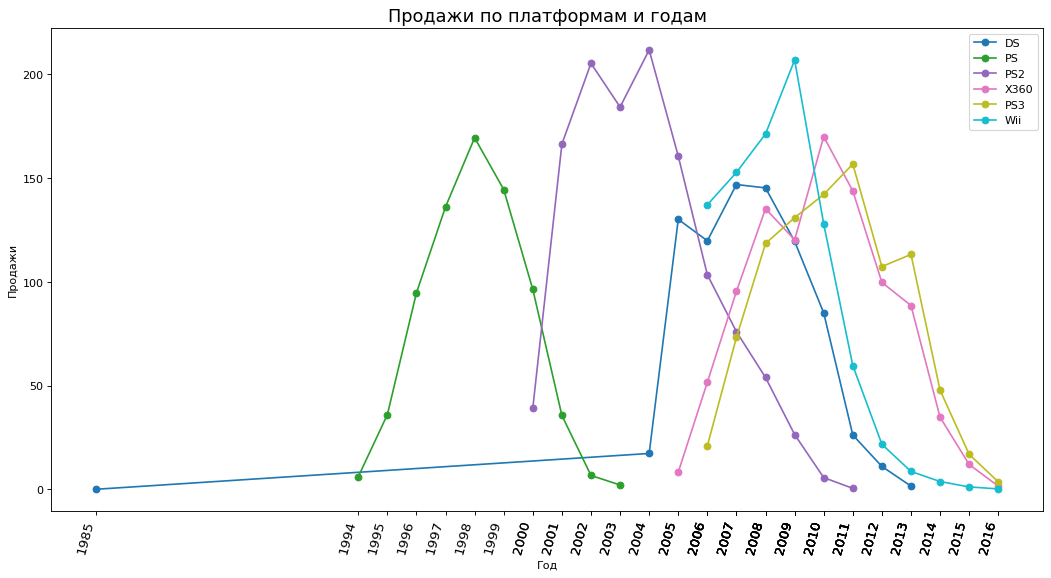

In [15]:
# Построим график распределения по годам и платформам.

colors = ([plt.cm.tab10(i/float(len(df_platforms_year_pvt['platform'].unique())-1)) 
           for i in range(len(df_platforms_year_pvt['platform'].unique()))])

fig, ax = plt.subplots(figsize=(16,8), dpi= 80)

for i, platform in enumerate(df_platforms_year_pvt['platform'].unique()):

    x = df_platforms_year_pvt[df_platforms_year_pvt['platform'] == platform]['year_of_release']
    y = df_platforms_year_pvt[df_platforms_year_pvt['platform'] == platform]['all_sales']

    ax.plot(x, y, c=colors[i], marker='o', label=platform)

ax.set_title('Продажи по платформам и годам', fontdict={'size':16})
ax.set(xlabel='Год', ylabel='Продажи')
plt.xticks(df_platforms_year_pvt['year_of_release'], rotation=75, horizontalalignment='right', fontsize=12)
plt.legend()
plt.show()

In [16]:
"""
Прогноз. 
Актуальными данными будут последние 3 года.
2014 и 2015 полные и 2016 не полный. Найдём среднее.
"""

df_predict = df[df['year_of_release'] >= 2014]
df_predict_pvt = (df_predict.pivot_table(['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales'], 
                                         index=['year_of_release', 'platform'], aggfunc='mean')
                  .reset_index().sort_values('all_sales', ascending=False))
df_predict_pvt['year_of_release'] = df_predict_pvt['year_of_release'].astype(int)

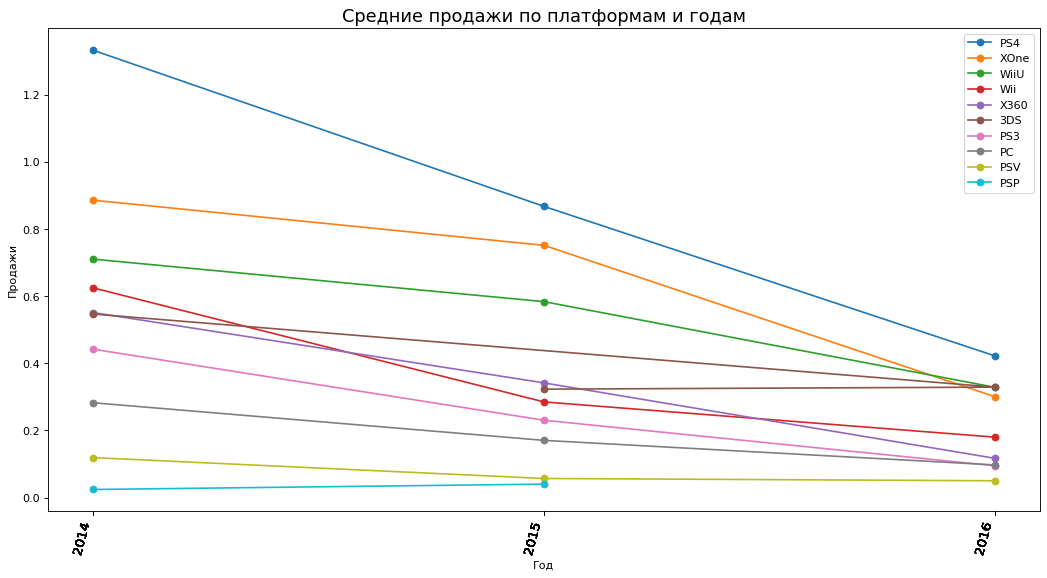

In [17]:
# Посмотрим на график средних продаж по годам.

colors = ([plt.cm.tab10(i/float(len(df_predict_pvt['platform'].unique())-1)) 
           for i in range(len(df_predict_pvt['platform'].unique()))])

fig, ax = plt.subplots(figsize=(16,8), dpi= 80)

for i, platform in enumerate(df_predict_pvt['platform'].unique()):

    x = df_predict_pvt[df_predict_pvt['platform'] == platform]['year_of_release']
    y = df_predict_pvt[df_predict_pvt['platform'] == platform]['all_sales']

    ax.plot(x, y, c=colors[i], marker='o', label=platform)

ax.set_title('Средние продажи по платформам и годам', fontdict={'size':16})
ax.set(xlabel='Год', ylabel='Продажи')
plt.xticks(df_predict_pvt['year_of_release'], rotation=75, horizontalalignment='right', fontsize=12)
plt.legend()
plt.show()

In [18]:
"""
Посмотрим в абсолютных числах по all sales.
Получили разбивку по выгодным платформам. PS5, это новая платформа, продажи низкие, но по графику видим тренд роста.
PSP можно в расчет не брать или малую часть только в Японии.
"""
df_predict_pvt.groupby('platform').sum().sort_values('all_sales', ascending=False)

,year_of_release,all_sales,eu_sales,jp_sales,na_sales,other_sales
platform,,,,,,
PS4,6045,2.623473,1.191591,0.120658,0.903640,0.407584
XOne,6045,1.938718,0.639106,0.004535,1.122103,0.172975
WiiU,6045,1.623145,0.499482,0.273975,0.730138,0.119551
3DS,6045,1.199154,0.218614,0.613655,0.315869,0.051015
Wii,6045,1.090000,0.575000,0.000000,0.432500,0.082500
X360,6045,1.010066,0.333663,0.001270,0.584791,0.090342
PS3,6045,0.767370,0.284787,0.142355,0.237747,0.102482
PC,6045,0.550175,0.365494,0.000000,0.147066,0.037616
PSV,6045,0.225818,0.035361,0.147273,0.025110,0.018074


In [19]:
# Прогноз продаж на 2017 год. Я бы спрогнозировал, как  среднее за предыдущие 2 периода и нынешний неполный год.
df_predict_pvt.groupby('platform').mean().sort_values('all_sales', ascending=False)

,year_of_release,all_sales,eu_sales,jp_sales,na_sales,other_sales
platform,,,,,,
PS4,2015.0,0.874491,0.397197,0.040219,0.301213,0.135861
XOne,2015.0,0.646239,0.213035,0.001512,0.374034,0.057658
WiiU,2015.0,0.541048,0.166494,0.091325,0.243379,0.039850
3DS,2015.0,0.399718,0.072871,0.204552,0.105290,0.017005
Wii,2015.0,0.363333,0.191667,0.000000,0.144167,0.027500
X360,2015.0,0.336689,0.111221,0.000423,0.194930,0.030114
PS3,2015.0,0.255790,0.094929,0.047452,0.079249,0.034161
PC,2015.0,0.183392,0.121831,0.000000,0.049022,0.012539
PSV,2015.0,0.075273,0.011787,0.049091,0.008370,0.006025


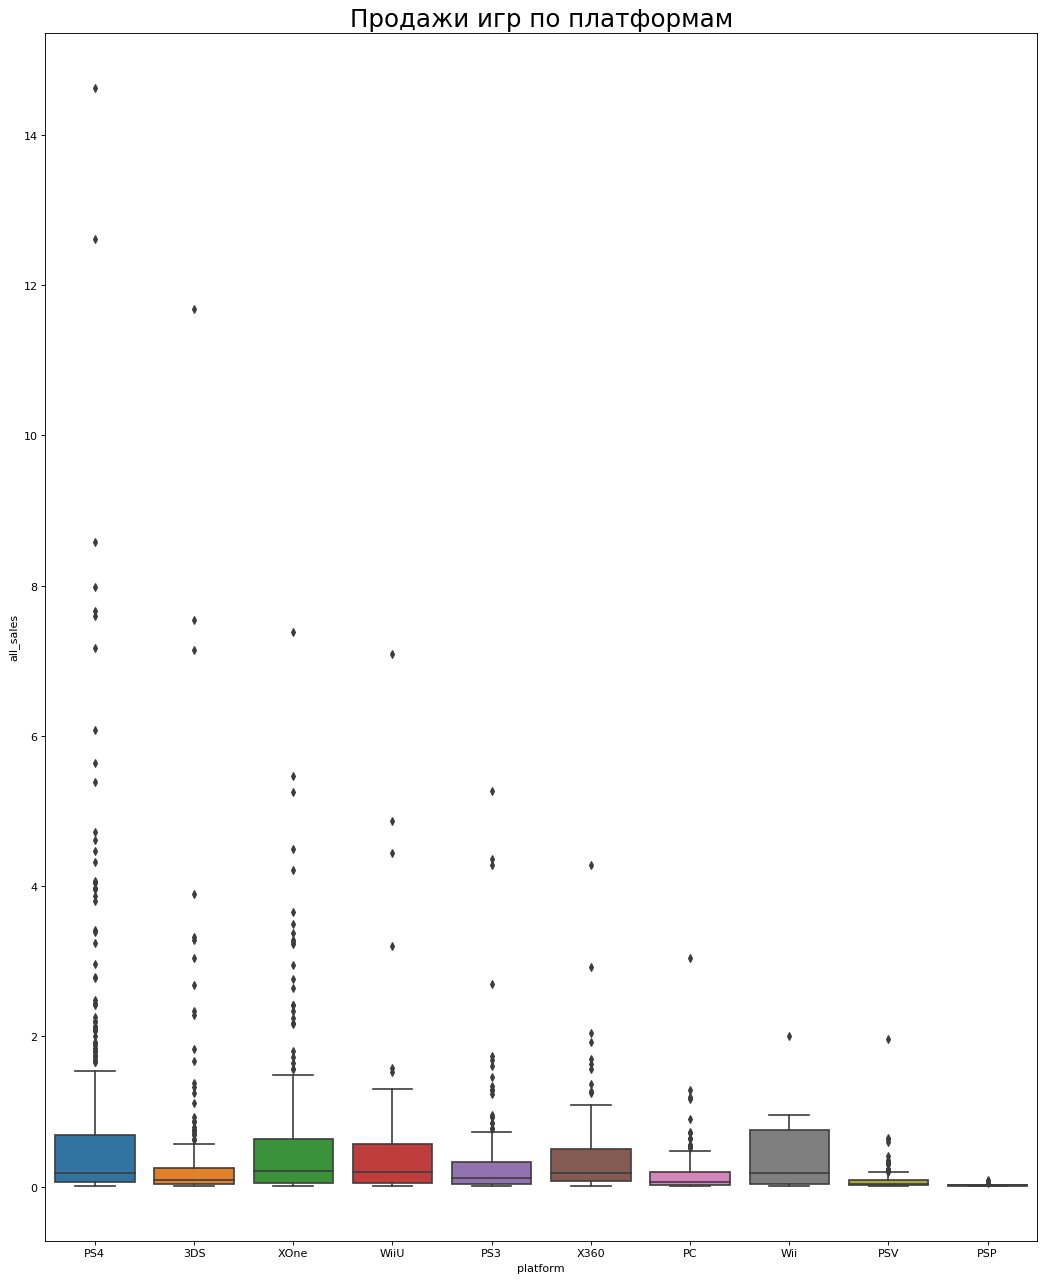

In [20]:
"""
Если построить боксплот по актуальным данным, то видим массу выбросов.
Это объяснимо тем, что одни игры могут быть намного популярнее других. Хиты продаются гораздо бОльшими тиражами,
чем обычные, проходные игры. Поэтому такой разброс.
"""
plt.figure(figsize=(16,20), dpi= 80)
sns.boxplot(x='platform', y='all_sales', data=df_predict)
plt.title('Продажи игр по платформам', fontsize=22)
plt.show()

In [21]:
# Посмотрим, как влияют на продажи отзывы пользователей и критиков. Платформу возьмём - PS4.

df_ps4 = df[df['platform'] == 'PS4']
df_ps4['critic_score_log'] = df_ps4['critic_score'] / 10
platform = df_ps4['platform']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


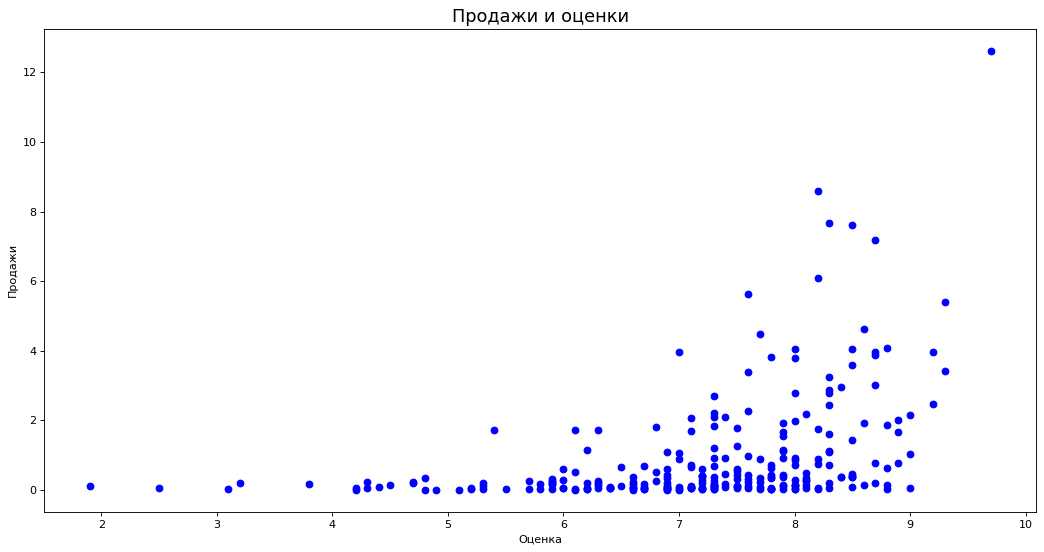

In [22]:
# Построим диаграмму рассеяния.

fig, ax = plt.subplots(figsize=(16,8), dpi= 80)

y = df_ps4[df_ps4['platform'] == platform]['all_sales']
x = df_ps4[df_ps4['platform'] == platform]['critic_score_log']

ax.scatter(x, y, c='b', label='critic_score_log')

ax.set_title('Продажи и оценки', fontdict={'size':16})
ax.set(xlabel='Оценка', ylabel='Продажи')
plt.show()

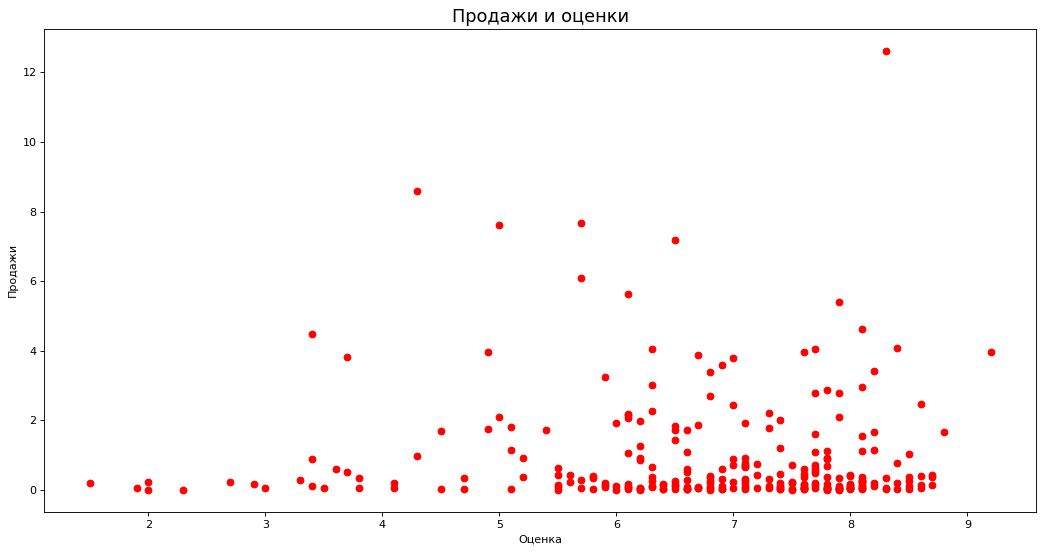

In [23]:
fig, ax = plt.subplots(figsize=(16,8), dpi= 80)

y = df_ps4[df_ps4['platform'] == platform]['all_sales']
x = df_ps4[df_ps4['platform'] == platform]['user_score']

ax.scatter(x, y, c='r', label='user_score')

ax.set_title('Продажи и оценки', fontdict={'size':16})
ax.set(xlabel='Оценка', ylabel='Продажи')
plt.show()

In [24]:
# Построитель хитмап.
def heatmap_df(df, title):
    df = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales', 'critic_score', 'user_score']]

    plt.figure(figsize=(12,10), dpi= 80)
    sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

    plt.title(title, fontsize=22)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

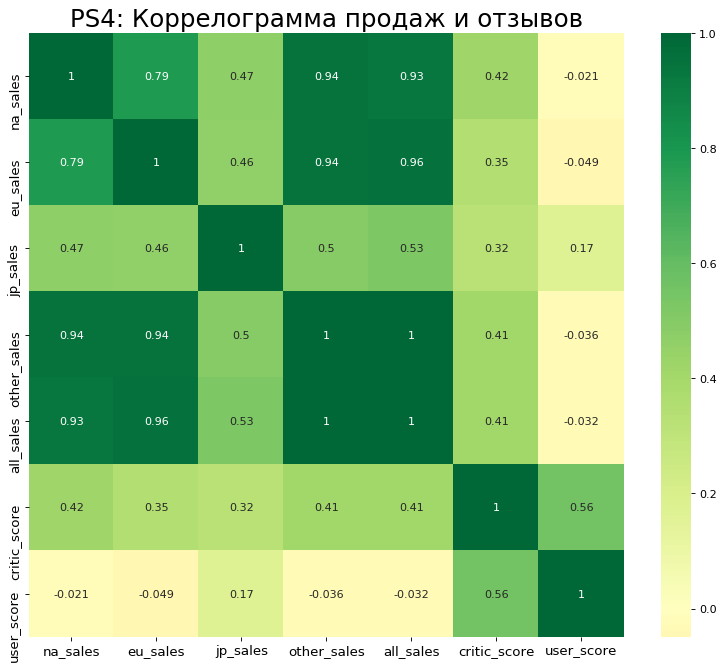

In [25]:
"""
Можем увидеть, что корреляция всех продаж по оценке критиков есть, 
а вот по оценке пользователей корреляции нет.

Однако любопытно, что прослеживается слабая корреляция между пользовательсткими оценками и продажами
в Японии.
"""
heatmap_df(df_ps4, 'PS4: Коррелограмма продаж и отзывов')

In [26]:
# Посмотрим, как обстоит дело по другим платформам.

df_3ds = df[df['platform'] == '3DS']
df_xone = df[df['platform'] == 'XOne']
df_wiiu = df[df['platform'] == 'WiiU']
df_ps3 = df[df['platform'] == 'PS3']

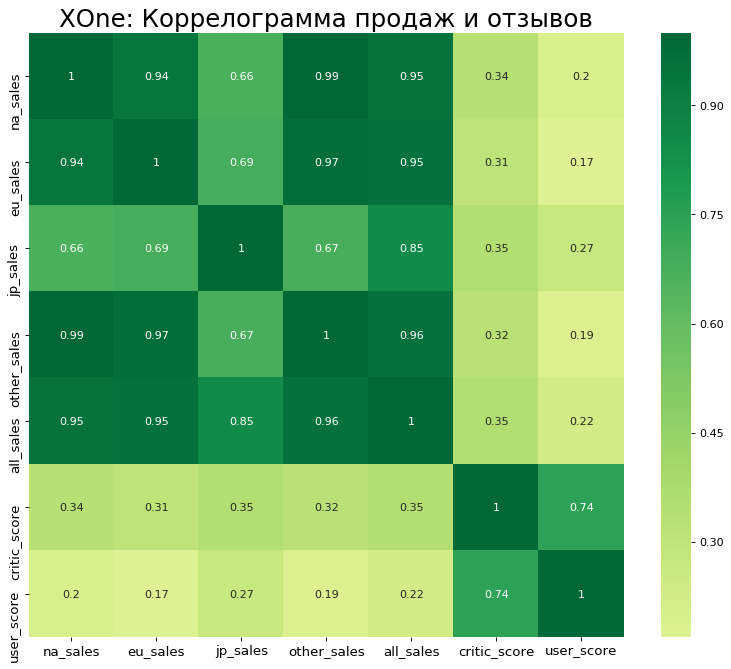

In [27]:
# Корреляция больше, но оценки критиков больше соотносятся с продажами.
heatmap_df(df_3ds, 'XOne: Коррелограмма продаж и отзывов')

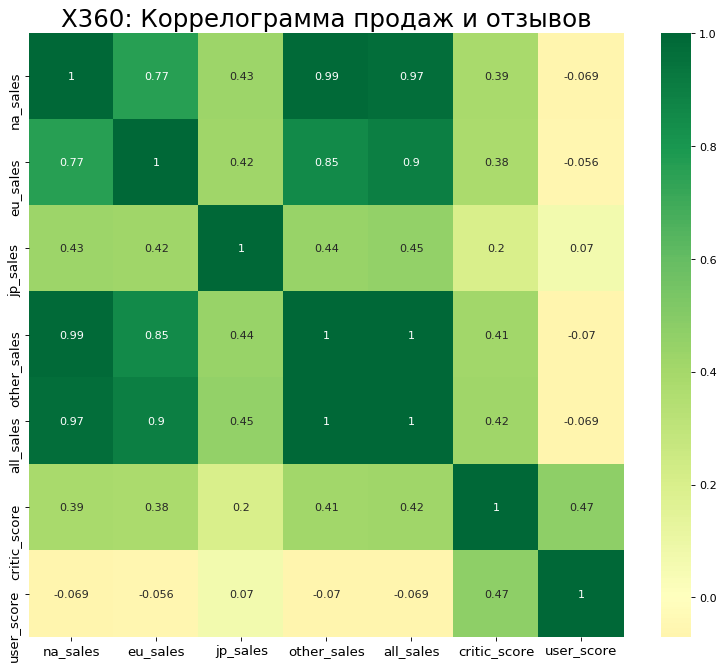

In [28]:
# Тут меньше коррелирует пользовательская оценка с продажами.
heatmap_df(df_xone, 'X360: Коррелограмма продаж и отзывов')

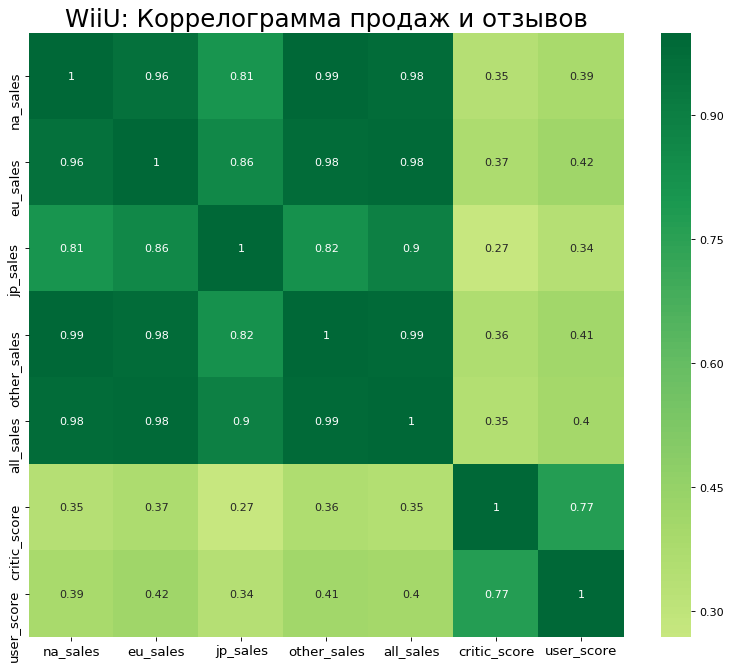

In [29]:
# А здесь интересно, что пользовательские оценки сильнее коррелирую с продажами, чем критиков.
heatmap_df(df_wiiu, 'WiiU: Коррелограмма продаж и отзывов')

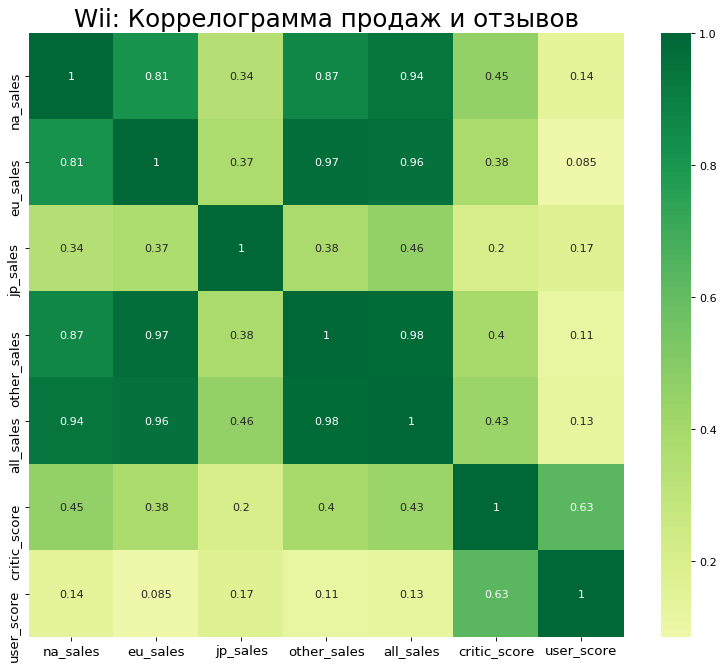

In [30]:
# Аналогично - слабая корреляция пользовательских оценок с продажами.
heatmap_df(df_ps3, 'Wii: Коррелограмма продаж и отзывов')

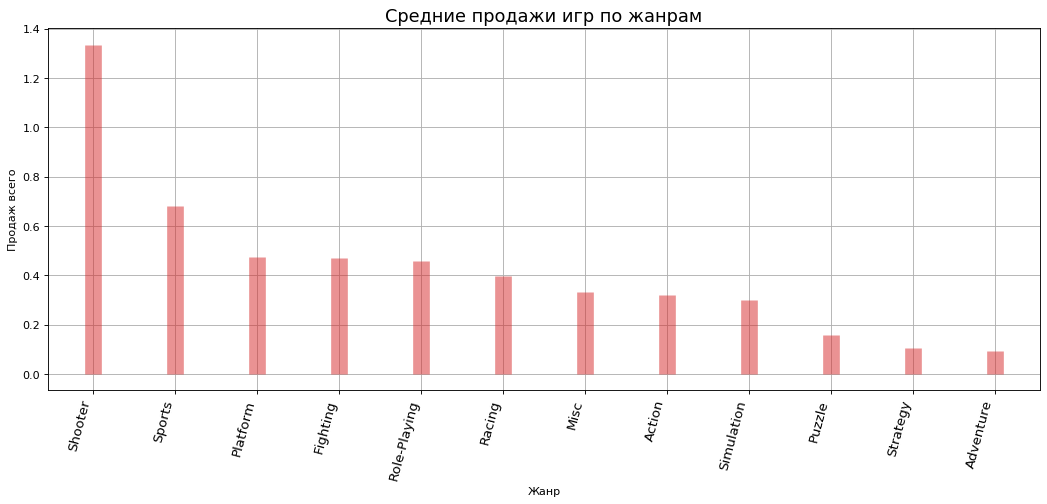

In [31]:
# Посмотрим на распределение по жанрам. Средние.

def genre_hist(funct, title, ylab):
    df_genre_pvt = (df_predict.pivot_table('all_sales', 
                                             index='genre', aggfunc=funct)
                      .reset_index().sort_values('all_sales', ascending=False))

    fig, ax = plt.subplots(figsize=(16,6), dpi= 80)

    x = df_genre_pvt['genre']
    y = df_genre_pvt['all_sales']

    ax.vlines(x=x, ymin=0, ymax=y, color='tab:red', alpha=0.5, linewidth=15)
    ax.set_title(title, fontdict={'size':16})
    ax.set(xlabel='Жанр', ylabel=ylab)
    plt.xticks(x, rotation=75, horizontalalignment='right', fontsize=12)
    plt.grid()
    plt.show()
    
genre_hist('mean', 'Средние продажи игр по жанрам', 'Продаж всего')

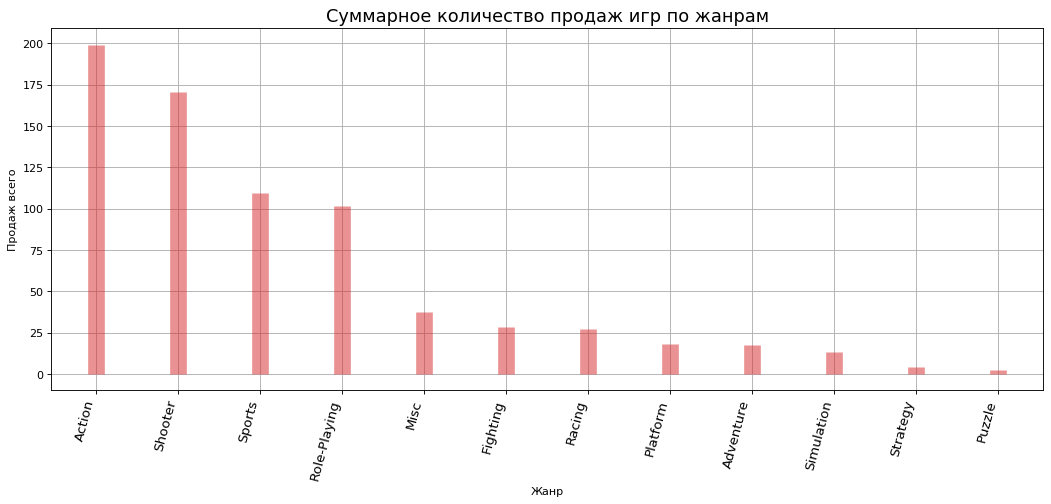

In [32]:
# Посмотрим на распределение по жанрам. Сумма продаж по жанрам.

genre_hist('sum', 'Суммарное количество продаж игр по жанрам', 'Продаж всего')

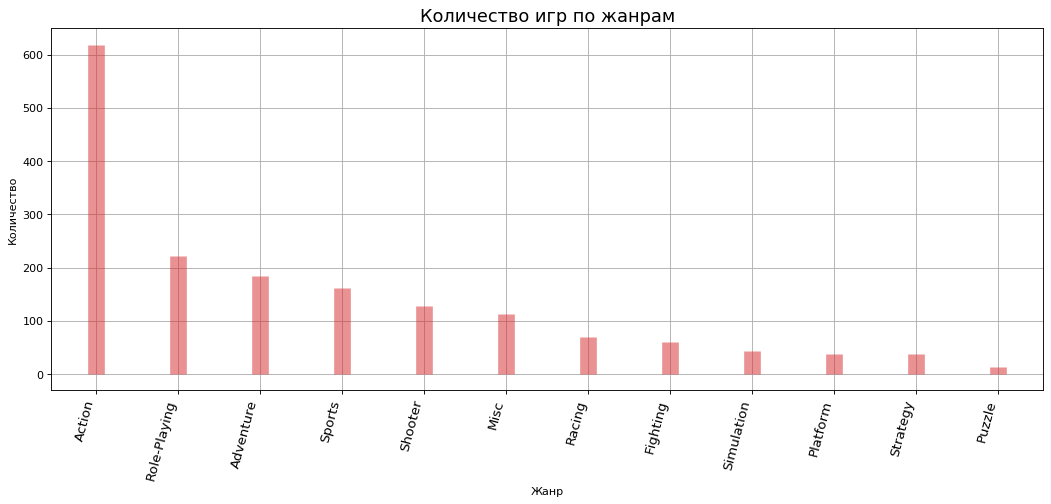

In [33]:
# Посмотрим на распределение по жанрам. Количество игр по жанрам.

genre_hist('count', 'Количество игр по жанрам', 'Количество')

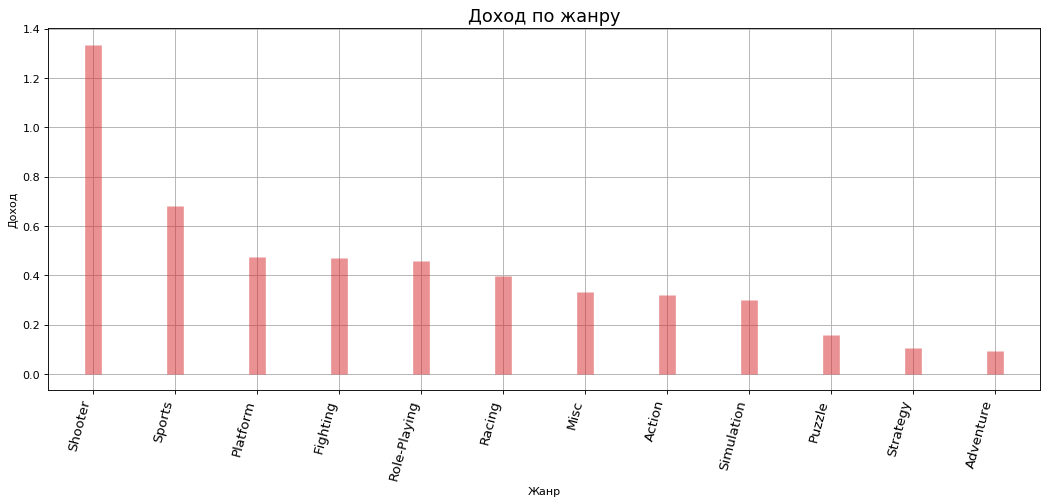

In [34]:
df_genre_pvt_sum = (df_predict.pivot_table('all_sales', 
                                         index='genre', aggfunc='sum')
                  .reset_index().sort_values('all_sales', ascending=False))

df_genre_pvt_count = (df_predict.pivot_table('all_sales', 
                                         index='genre', aggfunc='count')
                  .reset_index().sort_values('all_sales', ascending=False))

df_genre_pvt_earning = df_genre_pvt_sum.merge(df_genre_pvt_count, on='genre')
df_genre_pvt_earning.columns = ['genre', 'sales', 'count']
df_genre_pvt_earning['earning'] = df_genre_pvt_earning['sales'] / df_genre_pvt_earning['count']
df_genre_pvt_earning.sort_values('earning', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(16,6), dpi= 80)

x = df_genre_pvt_earning['genre']
y = df_genre_pvt_earning['earning']

ax.vlines(x=x, ymin=0, ymax=y, color='tab:red', alpha=0.5, linewidth=15)
ax.set_title('Доход по жанру', fontdict={'size':16})
ax.set(xlabel='Жанр', ylabel='Доход')
plt.xticks(x, rotation=75, horizontalalignment='right', fontsize=12)
plt.grid()
plt.show()

### Вывод

Можно увидеть по выборке, что игровая индустрия пережила бум по количеству игр с 2002 по 2011 год.<br>
По графику видим, что платформы живут около 10 лет.<br>
По всему анализу можно увидеть, что сейчас на подъёме PS4, а жанр Шутер. Причем этот жанр лидирует по доходности с одной игры.<br>
Корреляция между оценками и продажами не всегда явная. Можно сделать вывод, что на разных платформах и в разных регионах корреляция будет варьироваться.<br>
По графику боксплот увидели, что бывают игры-хиты, которые выбиваются из общей массы.

## Шаг 4. Составим портрет пользователя каждого региона

In [35]:
# Посмотрим на самые популярные платформы и жанры по регионам.
def region_analysis(sales, title, index, xlabel, color):
    df_pvt = (df[df['year_of_release'] >= 2014].pivot_table(sales, index=index, aggfunc='sum')
                      .reset_index().sort_values(sales, ascending=False))
    df_pvt = df_pvt.head(5)

    fig, ax = plt.subplots(figsize=(10,5), dpi= 80)

    x = df_pvt[index]
    y = df_pvt[sales]

    ax.vlines(x=x, ymin=0, ymax=y, color=color, alpha=0.5, linewidth=15)
    ax.set_title(title, fontdict={'size':16})
    ax.set(xlabel=xlabel, ylabel='Продажи')
    plt.xticks(x, rotation=75, horizontalalignment='right', fontsize=12)
    plt.grid()
    plt.show()

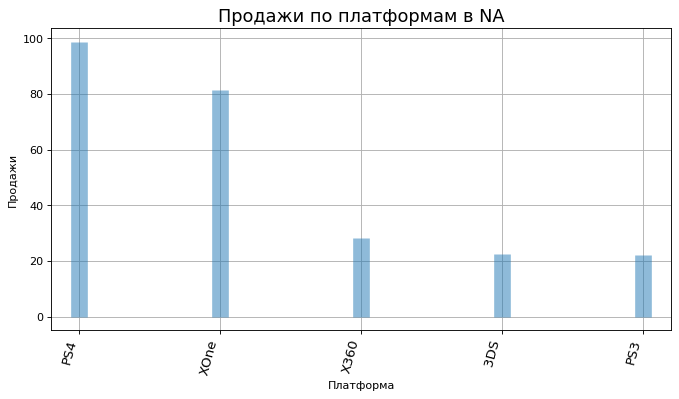

In [36]:
region_analysis('na_sales', 'Продажи по платформам в NA', 'platform', 'Платформа', 'tab:blue')

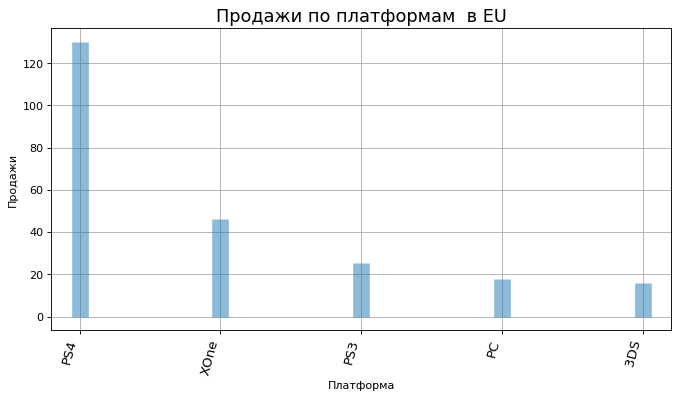

In [37]:
region_analysis('eu_sales', 'Продажи по платформам  в EU', 'platform', 'Платформа', 'tab:blue')

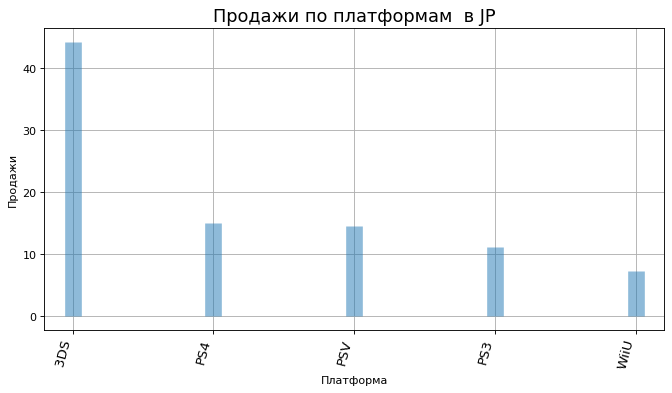

In [38]:
region_analysis('jp_sales', 'Продажи по платформам  в JP', 'platform', 'Платформа', 'tab:blue')

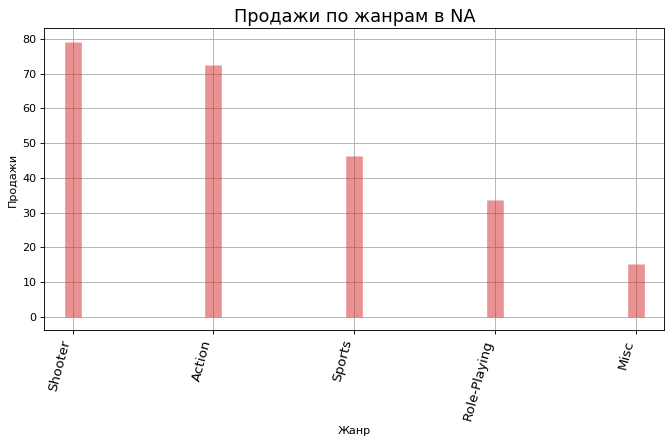

In [39]:
region_analysis('na_sales', 'Продажи по жанрам в NA', 'genre', 'Жанр', 'tab:red')


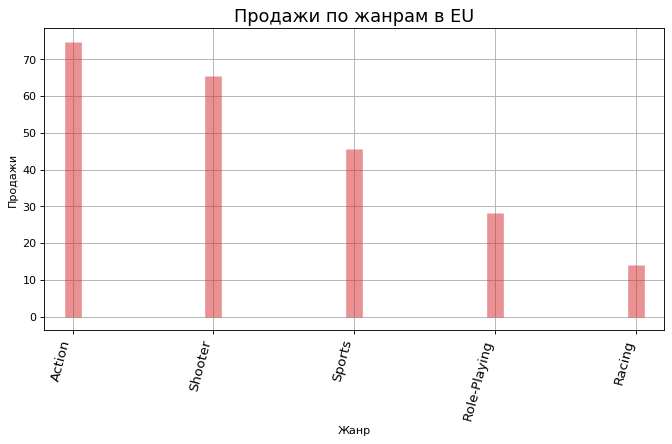

In [40]:
region_analysis('eu_sales', 'Продажи по жанрам в EU', 'genre', 'Жанр', 'tab:red')

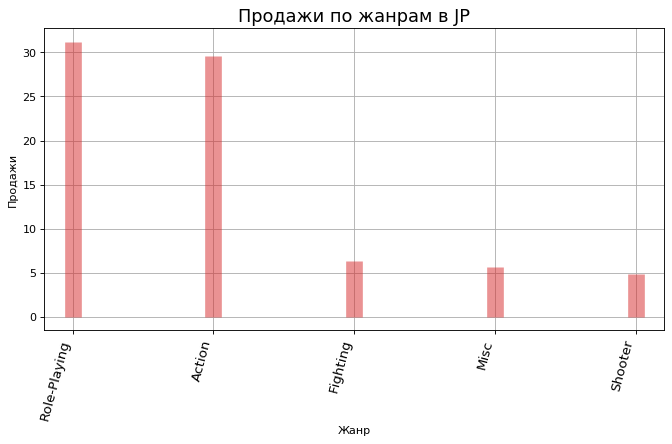

In [41]:
region_analysis('jp_sales', 'Продажи по жанрам в JP', 'genre', 'Жанр', 'tab:red')

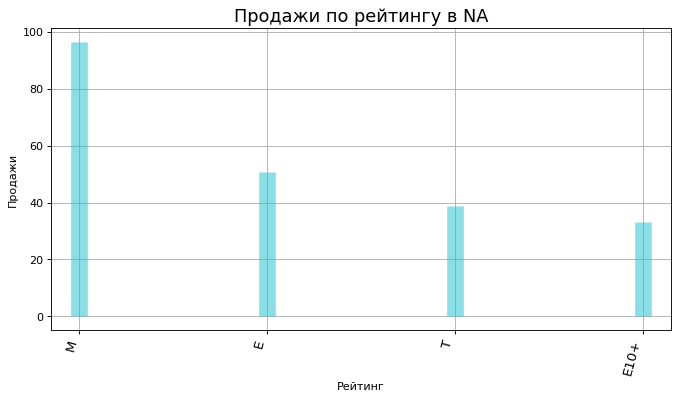

In [42]:
region_analysis('na_sales', 'Продажи по рейтингу в NA', 'rating', 'Рейтинг', 'tab:cyan')

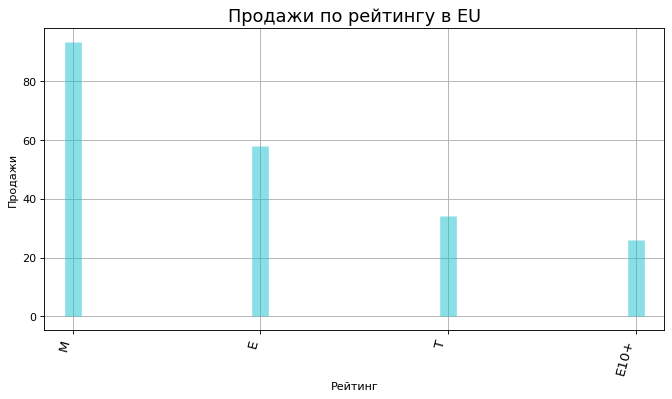

In [43]:
region_analysis('eu_sales', 'Продажи по рейтингу в EU', 'rating', 'Рейтинг', 'tab:cyan')

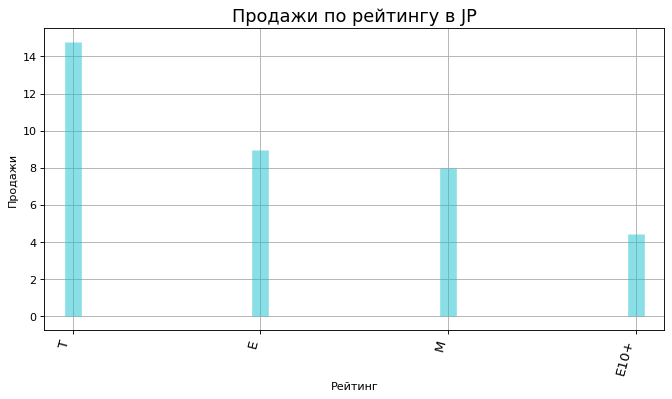

In [44]:
region_analysis('jp_sales', 'Продажи по рейтингу в JP', 'rating', 'Рейтинг', 'tab:cyan')

### Вывод

Самые популярные платформы в регионах мира различаются.<br>
В NA и EU популярностью пользуется PS4, следом идёт XOne, а в JP 3DS и PS4. Можно сказать, что японские производители в мире очень популярны.

Самые популярные жанры в мире различаются.<br>
В NA это Shooter и Action. В EU Action и Shooter. А вот JP самый популярный жанр - RPG и Action.

В NA и EU самым популярным рейтингом является M - Mature. А в JP самый популярный рейтинг T - Teen. Второе место во всех регионах E - Everione.

Таким образом, для каждого региона можно выделить определенные игровые предпочтения.

## Шаг 5. Проверим гипотезы

In [45]:
# Дисперсии отличаются больше чем на 5%.

1 - df[(~df['user_score'].isna()) & (df['platform'] == 'XOne')]['user_score'].var() /\
df[(~df['user_score'].isna()) & (df['platform'] == 'PC')]['user_score'].var()

0.18531813112803086

In [46]:
"""
Формируем нулевую гипотезу:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Альтернативная:
Средние пользовательские рейтинги платформ Xbox One и PC различаются 
"""

from scipy import stats as st

alpha = .01 # критический уровень статистической значимости

results = st.ttest_ind(df[(~df['user_score'].isna()) & (df['platform'] == 'XOne')]['user_score'],
                       df[(~df['user_score'].isna()) & (df['platform'] == 'PC')]['user_score'], equal_var=False)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.935072360183565e-06
Отвергаем нулевую гипотезу


In [47]:
# Дисперсии отличаются больше чем на 5%.

1 - df[(~df['user_score'].isna()) & (df['genre'] == 'Action')]['user_score'].var() /\
df[(~df['user_score'].isna()) & (df['genre'] == 'Sports')]['user_score'].var()

0.21750996318756866

In [48]:
"""
Формируем нулевую гипотезу:
Средние пользовательские рейтинги жанров Action и Sports одинаковые
Альтернативная:
Средние пользовательские рейтинги жанров Action и Sports различаются 
"""

alpha = .01 # критический уровень статистической значимости
    
results = st.ttest_ind(df[(~df['user_score'].isna()) & (df['genre'] == 'Action')]['user_score'],
                       df[(~df['user_score'].isna()) & (df['genre'] == 'Sports')]['user_score'], equal_var=False)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


### Вывод

Для задачи возьмем критерий Стьюдента, двустороннюю гипотезу. Нулевая гипотеза формулируется, как отсутствие различий.
Критерий значимости установим 0.01. Это значит, что смотрим на распределение справа и слева на 0,5% от предполагаемого значения.

Мы видим, что пользователи ставят разные рейтинги на PC и XOne. А вот средние пользовательские рейтинги рассматриваемых жанров почти одинаковые.

## Шаг 6. Напишем общий вывод

Исходя из нашего анализа, для разных регионов следует сделать ставки на разные платформы и игры.

Для продаж в NA рекламировать:<br>
Платформы - PS4, XOne, X360, 3DS, PS3<br>
Жанры - Shooter, Action, Sports, RPG, Misc<br>
Рейтинг - M, E, T, E10+<br>

Для продаж в EU рекламировать:<br>
Платформы - PS4, XOne, PS3, PC, 3DS<br>
Жанры - Action, Shooter, Sports, RPG, Racing<br>
Рейтинг - M, E, T, E10+<br>

Для продаж в JP рекламировать:<br>
Платформы - 3DS, PS4, PS5, PS3, WiiU<br>
Жанры - RPG, Action, Fighting, Misc, Shooter<br>
Рейтинг - T, E, M, E10+<br>

В EU и NA стоит сделать ставку на более взрослую аудиторию, в JP на подростков.

По коррелограммам можно увидеть, что оценки критиков коррелируют с продажами чаще, чем пользовательские. 

Ну и конечно, делать ставку на игры-хиты, продажи по которым преввышают средние по обычным играм.